### 讀取需要的函式庫

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import clear_output
from wordcloud import WordCloud
from PIL import Image
import seaborn as sns
from func import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import jieba
import sys
import re
import os
# re -> \d for number, \s for any space (\t\r\n...) 

### 定義 addstopword 及 adddict 函式

In [2]:
def addstopword(data):
    stop = []
    if os.path.isfile('./stay.txt'):
        with open('./stay.txt', 'rb') as f:
            text = f.read()
            encode = chardet.detect(text)
        stay = list(map(str.strip, open('./stay.txt', 'r+', encoding=encode['encoding']).readlines()))
    else:
        stay = []
    length = len(data)
    index = 0
    value = ''
    tmp = ''
    while(index != length):
        if data[index] not in stay:
            print(data[index])
            value = input('Add to stop word [y:stopword/n:stayword/q:quit]: ')
            if value == 'y':
                if tmp == 'p': stay.remove(data[index])
                stop.append(data[index])
            elif value == 'n':
                if tmp == 'p': stop.remove(data[index])
                stay.append(data[index])
            elif value == 'p':
                index -= 2
            elif value == 'q':
                break
            clear_output()
        tmp = value
        index += 1
    return stop, stay


def addword():
    word = []
    while(True):
        # clear_output()
        value = input('Add to dictionay word [q:quit]: ')
        if value == 'q':
            break
        else:
            word.append(value)
    return word

### 讀取資料夾中的資料

In [3]:
#path = '../../107-1PythonSampleCode/week_5/task_5/*.txt'
path = 'C:/Users/User/Desktop/20181106python/Week_6/all1/*.txt'
title, data = readdir(path)


Number of files : 15


### 顯示部份資料內容

In [4]:
for i in range(len(data)):
    print('----Document : {0}----'.format(title[i]))
    print(data[i][:10], '...', data[i][-10:-1], sep='\n', end='\n\n')

----Document : 1----
中國政府核准鴻夏戀 
...
LED 面板的需求

----Document : 10----
〈夏普OLED量產〉
...
會提前達成。


----Document : 11----
鴻海11月營收創新高
...
個月就重返東證一部

----Document : 12----
夏普OLED將量產 
...
領域
的重大突破

----Document : 13----
夏普轉虧為盈！郭董3
...

成效已開始顯現

----Document : 2----
獲鴻海注資 夏普評級
...
證二部重回東證一部

----Document : 3----
鴻夏戀齊步走 鴻家軍
...
下半年可望營收成長

----Document : 4----
郭董神準！1月逢低質
...
安心拚投資、拚經濟

----Document : 5----
〈郭董再出招〉 傳鴻
...
的供貨
預作準備

----Document : 6----
鴻海入主2年 夏普搶
...
受到手機客戶的青睞

----Document : 7----
鴻海正式入主夏普70
...
係，
協助夏普重

----Document : 8----
鴻海改革續見成果 夏
...
18 年度財測預估

----Document : 9----
強化與鴻海合作！夏普
...
幅縮小(轉虧為盈)

----Document : first_all----
1.鴻夏戀 郭台銘沒
...
狂飆16.8%。

----Document : second_all----

1.	鴻夏戀一波
...








### 新增詞彙至自定義詞庫，並匯入該詞庫
* savetofile(path, list_like_data)
* example for list_like_data:
  * [['來台']] : 完整 '來台' 字串被存入字典中
  * ['來台'] :　'來台' 視為獨立字元，存入 '來' '台' 於字典中 

In [5]:
# savetofile('./dict.txt', [['來台']])  # 完整字串　'來台'　被存入字典中
jieba.load_userdict('C:/Users/User/Desktop/20181106python/Week_6/dict.txt')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache
Loading model cost 1.631 seconds.
Prefix dict has been built succesfully.


### 新增詞彙至自定義停止詞彙中

In [6]:
stopword = ['一','二','三','四','五','六','七','八','九','十','年','月','日','用','淨','利','值','前',
             '據','談','自','至','曾','出',
            '合','最','供','而','個','很','得','達','家','進','所','夏','若','邱','但','中','可',
            '他','我','列','將','對','之','率','已','由','佔','本','日','月','年','另','故','於',
            '較','請','再','經','也','在','依','到','等','或','大','認列','不僅','讓','相關','最終',
            '把','沒','及','過去','認為','為','按','比','仍','係','後','及與','以','時','該','的',
            '並','更','就','註','有','事','來','不','從','堺','權','卻','說','要','今','度',
            '手','才','又','其','長','了','百','億','元','例如','可能','由於','因此','土城','一份',
            '上午','這份','多','赴','和','與','是','約','就是','只是','但是','如果','附註','部分',
            '事項','各位','品牌','集團','幅度','資產','新','台幣','日圓','億日圓','機構','面板','日元',
            '企業','報導','媒體','目前','提案','經營','實地','大阪','億元','以及','代工','一步','第二',
            '雙方','方案','分析','接受','成為','事業','目前','高橋','董事','營業','受到','提供','使用',
            '本年','說明','現金','成本','營業外','收入','結轉','分攤','其他','影響財務','詳合','結果',
            '不是','是否','最高','記者','超過','兩家','主幹','我們','除了','自己','立刻','','日本',
            '之間','不過','今天','然而','此外','工廠','預測','如下','之一','附註','附','註','其中',
            '因為','查核','報告增加','會計','相對','仟元','金額','權益','能力利益','股東','合理性',
            '假設','無形','上','開關鍵','模型','支出','控制','計算','資金評估','報告','因應','仟元',
            '金額','權益','假設','無形','上','模型','支出','控制','計算資金','評估','人次','重大',
            '資訊','總額','民國','估計','一副','公司','年度','包括','正確性','正','確性','減損','共為',
            '預估','預算','去年同期','應該','雖然','下午','要求','一樣','一家','維持','公開','整體',
            '表示','特性','市場','科目','發生','年本','重要','判斷','主要','流量','意見','關鍵','同期',
            '評價','正確','地區','總資產','執行','程序','測試','稅後淨利','股份有限公司','蘋果','鴻海',
            '夏普','郭台銘','鴻夏戀','iPhone','1','2','3','4','5','6','7','8','9','0','NT','2012',
            '10','三星','供應商','INCJ','案','LG','會','下','買','電子','清單','向','都',
            '能力','進','廠','內','購','併','這','看','人','被','能','外界','指出','五日','不同','陷入',
            '出現','一年','什麼','安倍','這個','可以','一個','同時','去年','部門','二月','這是','月底',
            '完成','財務','今年','階段','子公司','條件','引述','召開','擁有','有助','持有','進入','旗下',
            '已經','入座','罩','業務','顯示','尺寸','萬張','取得','高達','持續','進行','人士','提出',
            '社長','加工','內容','總部','沒有','加上','決定','群創','最大','四年','代廠','做','鴻','高',
            '市','不會','傳出','文件','客戶超過','SDP','JDI','IGZO','Display','WitsView','NHK',
            '12','7000','3500','2015','2016','25','30','000','29''一下子', '一九', '一九九九年', '一二八',
             '一兆日圓', '一再', '一勞永逸', '一千七百', '一千五百', '一口', '一向', '一哩路', '一四會計', '一回',
             '一城', '一塊', '一夕', '一天', '一套', '一季', '一宗', '一役', '一心', '一成則', '一手', '一把', '一搏', 
             '一擲', '一攤', '一支', '一方', '一月', '一月底', '一樁', '一比', '一流', '一片', '一百', '一百三十元', 
             '一百九十', '一站', '一筆', '一職', '一舉', '一般性', '一起', '一路', '一身', '一連串', '一進',
            '一下子', '一部', '一項', '一顆', '七七', '七五', '七千', '七四', '七年', '三九', '三五', '三個', '三億',
            '三兆台幣', '三公', '三六', '三十九', '三十五', '三十分', '三千', '三名', '三大會', '三成', '三支', '三方',
            '三月', '三月底', '三率', '三筆', '三等', '三箭', '三緘其口', '三角', '三足鼎立', '三降', '三點', '上個', '上千',
            '上升', '上半年', '上台', '上周', '上層', '上層察覺', '上市', '上揚', '上攻', '上放著', '上旬', '上極']
puncs_Full = '！？｡＂＃＄％＆＇（）()＊＋，－／：；＜＝＞＠［＼］$＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'
puncs_Half = "!?.#$%&'()*+,-/:;<=>@[]^_{}|~\\\""
# savetofile('./stopword.txt', [stopwords, puncs_Full, puncs_Half])

In [7]:
# stopword = readdir('./stopword.txt')[1][0].split('\n')
stopword.append('\n')
stopword[0:10]

['一', '二', '三', '四', '五', '六', '七', '八', '九', '十']

### 利用 jieba 對文件進行斷字，並統計字詞頻率，顯示前十名資料

In [8]:
wordDictionary = []
for i in range(len(data)):
    seg_list = jieba.cut(data[i], cut_all=False)
    seg_list = list(seg_list)
    wordDict = {}
    for w in seg_list:
        if (w not in stopword) and (w not in puncs_Full) and (w not in puncs_Half):
            if w in wordDict:
                wordDict[w] = wordDict[w] + 1
            else:
                wordDict[w] = 1
    wordDictionary.append(wordDict)
    print('Number of word in document ({0}) : '.format(title[i]), len(wordDict))
    sort = sorted(wordDict.items(), key=lambda x: x[1], reverse = True)
    print(sort[0:10])
    data[i] = ' '.join(jieba.cut(data[i], cut_all=False))

Number of word in document (1) :  50
[(' ', 6), ('\r\n', 6), ('股價上漲', 2), ('注資', 2), ('中國政府', 1), ('核准', 1), ('17', 1), ('獲', 1), ('中國商務部', 1), ('反壟斷局', 1)]
Number of word in document (10) :  76
[(' ', 55), ('\r\n', 19), ('OLED', 11), ('量產', 3), ('郭董', 3), ('設定', 3), ('供應', 3), ('戰國時代', 2), ('商品化', 2), ('目標', 2)]
Number of word in document (11) :  107
[(' ', 76), ('\r\n', 23), ('11', 6), ('X', 6), ('營收', 5), ('第', 4), ('產品', 4), ('創新高', 3), ('重返', 3), ('東證一部', 3)]
Number of word in document (12) :  137
[('\r\n', 34), ('OLED', 24), ('量產', 10), (' ', 7), ('手機', 7), ('供應', 7), ('智慧', 5), ('訂單', 4), ('開始', 4), ('郭董', 3)]
Number of word in document (13) :  106
[('\r\n', 16), ('轉虧為盈', 3), ('郭董', 3), (' ', 2), ('做到', 2), ('入主', 2), ('戴正吳', 2), ('戴桑', 2), ('台灣', 2), ('拿回', 2)]
Number of word in document (2) :  82
[('\r\n', 16), (' ', 5), ('股價上漲', 3), ('R&I', 3), ('未來', 3), ('注資', 2), ('評級', 2), ('投資', 2), ('融資額度', 2), ('評等調升', 2)]
Number of word in document (3) :  114
[('\r\n', 17), ('股價上漲', 5

### 顯示各文件低於閥值 (limit) 的字詞

In [9]:
limit = 0
wordsperdocument = 50
for i in range(len(data)):
    count = 0
    print('----Document : {0}----'.format(title[i]))
    for ind, value in wordDictionary[0].items():
        if (value <= limit) & (count != wordsperdocument):
            count += 1
            print(ind, end = ', ')
    print()

----Document : 1----

----Document : 10----

----Document : 11----

----Document : 12----

----Document : 13----

----Document : 2----

----Document : 3----

----Document : 4----

----Document : 5----

----Document : 6----

----Document : 7----

----Document : 8----

----Document : 9----

----Document : first_all----

----Document : second_all----



### 利用 wordDictionary 移除出現次數低於閥值 (limit) 的字詞，並顯示部份結果

In [10]:
for i in range(len(data)):
    for key, value in wordDictionary[0].items():
        if value <= limit:
            data[i] = data[i].replace(key, '')
    print('document :', title[i])
    print(data[i][:50], '...', data[i][-50:-1], sep='', end='\n\n')

document : 1
中國政府 核准 鴻夏戀   夏普 股價上漲 17 ％ 
 鴻海 集團 獲 中國商務部 反壟斷局 行... 客戶 蘋果 ， 將在 未來 iPhone   新機 上 採用   OLED   面板 的 需求 

document : 10
〈 夏普 OLED 量產 〉 郭董 令出 必行   iPhone   OLED 面板 戰國時代 將起...於 夏普 所 設定 的   2019   年 營運 目標 ， 將有 機會 提前 達成 。 
 

document : 11
鴻海 11 月 營收 創新高   夏普 也 重返 東證一部 
 受到 蘋果   iPhone   ...， 但 最後 證明 夏普 只花 了   
 1   年   4   個 月 就 重返 東證一部 

document : 12
夏普 OLED 將 量產   擴大 鴻海 搶單 優勢 
 鴻海 與 夏普 合體 出擊 ， 在 手機...夏普 加入 iPhone   OLED 供應 商 ， 將是 台企 面板 領域 
 的 重大突破 

document : 13
夏普 轉虧為盈 ！ 郭董 3 招神 救援   讓 日本 人驚 呆 
 鴻海 董事長 郭台銘 真的 ... 能 刪減成本 ； 三 、 鴻海 入主 夏普 後 力推 組織改造 ， 
 成效 已 開始 顯現 

document : 2
獲 鴻海 注資   夏普 評級 、 股價上漲 
 12 日 鴻海 對 夏普 投資 資金 到位 ， ...看好 ， 
 未來 隨著 夏普 營運改善 ， 股票 還有 機會 從 東證 二部 重回 東證一部 

document : 3
鴻夏戀 齊步 走   鴻家軍 慶祝 行情 發亮 鴻海 正式入主 夏普 ， 
 戴正吳 出任 夏普 ...成長 ， 隨著 電視 、 雲端 、 車用 、 3C 訂單 增溫 ， 
 下半年 可望 營收成長 

document : 4
郭董 神準 ！ 1 月 逢 低 質押 持股 43 萬張   拚 經濟 又 賺 價差 
 近期 投資...神準 出手 ， 
 不但 不用 擔心 股票 被 追繳 ， 就 能 安心 拚 投資 、 拚 經濟 

document : 5
〈 郭董 再 出招 〉   傳 鴻海 攜手 夏普 於 鄭州 設 OLED 廠面 對 中國 廠商 可能...  面板廠 ， 目

### 移除所有標點符號、非中文英文數字之資料

In [11]:
for i in range(len(data)):
    data[i] = re.sub('[^\u4e00-\u9fff ]', '', data[i])
#[^\u4e00-\u9fff A-Za-z0-9]

### 印出部份斷字結果

In [12]:
for i in range(len(data)):
    print('document :', title[i])
    print(data[i][:20], ' ... ', data[i][-20:-1], sep='', end='\n\n')

document : 1
中國政府 核准 鴻夏戀   夏普 股價上 ... 機 上 採用      面板 的 需求

document : 10
 夏普  量產  郭董 令出 必行    ... 運 目標  將有 機會 提前 達成  

document : 11
鴻海  月 營收 創新高   夏普 也  ...       個 月 就 重返 東證一部

document : 12
夏普  將 量產   擴大 鴻海 搶單  ... 將是 台企 面板 領域  的 重大突破

document : 13
夏普 轉虧為盈  郭董  招神 救援   ... 推 組織改造   成效 已 開始 顯現

document : 2
獲 鴻海 注資   夏普 評級  股價上 ...  機會 從 東證 二部 重回 東證一部

document : 3
鴻夏戀 齊步 走   鴻家軍 慶祝 行情 ... 訂單 增溫   下半年 可望 營收成長

document : 4
郭董 神準   月 逢 低 質押 持股  ...   就 能 安心 拚 投資  拚 經濟

document : 5
 郭董 再 出招    傳 鴻海 攜手  ... 年 或 之 後 的 供貨  預作 準備

document : 6
鴻海 入主  年   夏普 搶 吃 蘋果 ... 板 正逐漸 受到 手機 客戶 的 青睞

document : 7
鴻海 正式入主 夏普  億 日元     ... 果 的 良好 關係   協助 夏普 重

document : 8
鴻海 改革 續見 成果   夏普  財年 ...  財報 及      年度 財測 預估

document : 9
強化 與 鴻海 合作  夏普 在 龍華  ... 億日圓    大幅 縮小  轉虧為盈 

document : first_all
  鴻夏戀   郭台銘 沒學 的  大阪 ... 新高 水準  夏普  日收盤 狂飆  

document : second_all
    鴻夏戀 一波三折   回顧  年 ... 會否 節外 生枝  拭目以待     



### 初始化 TFIDF 物件，用以計算 tfidf

In [13]:
tfidf_vectorizer = TfidfVectorizer(max_df = 1, min_df = 0, analyzer = 'word'
                                   , stop_words = stopword, max_features = 10000)
#tfidf_vectorizer = CountVectorizer(stop_words = stopword)

### 顯示初始化時輸入的停止詞彙 

In [14]:
print(tfidf_vectorizer.get_stop_words())

frozenset({'', '上市', '應該', '百', '而', '三', 'SDP', '能力利益', '一個', '持有', '讓', '最大', '權益', '意見', '代廠', '正', '一進', '三九', '三支', '公司', '2015', '淨', '第二', '三個', '其他', '三率', '超過', '一千七百', '營業', '更', '高', '1', '最高', '三方', '立刻', '重要', '約', '擁有', '一四會計', '說明', '資訊', '子公司', '民國', '該', '三降', '集團', '三十分', '下午', '上旬', '今', '報告增加', '尺寸', '就', '決定', '把', 'NHK', '一職', '一', '如下', '七千', '三公', '文件', '同時', '權', '本年', '出現', '月底', '主幹', '一勞永逸', '三筆', '結轉', '人', '如果', '條件', '可以', '7000', '股東', '三千', '億', '金額', 'Display', '地區', '25', '一般性', '三成', '0', '上揚', '一向', '幅度', '四', '董事', '一方', '註', '報告', '比', '此外', '稅後淨利', '萬張', '加上', 'WitsView', '據', '新', '郭台銘', '整體', '估計', '2', '鴻', '二月', '案', '事', '9', '會計', '一城', '5', '4', '分析', '一擲', '到', '一套', '指出', '上攻', '一下子', '及與', '經營', '一再', '提案', '一家', '由', '三足鼎立', '結果', '目前', '四年', '完成', '是', '做', '群創', '一九', '再', '這個', '上層察覺', '兩家', '廠', '一起', '詳合', '一哩路', '其中', '上層', '由於', '有', '夏', '去年同期', '關鍵', '8', '之一', '不過', '赴', '億日圓', '一塊', '內', '進行', '曾', '三五', '但', '只是', '利', '一回'

### 計算 TFIDF 詞頻矩陣

In [15]:
tfidf_matrix = tfidf_vectorizer.fit_transform(data)
tfidf_matrix

<15x2911 sparse matrix of type '<class 'numpy.float64'>'
	with 2911 stored elements in Compressed Sparse Row format>

### 顯示 TFIDF 詞頻矩陣大小

In [16]:
tfidf_matrix.shape

(15, 2911)

### 顯示部份 TFIDF 詞頻矩陣中的字詞

In [17]:
words = tfidf_vectorizer.get_feature_names()
print(words[0:50])

['一五', '一來', '一半', '一段', '一波', '一波三折', '一股', '上任', '上樹', '上游', '下一個', '下令', '下來', '下來並', '下修', '下台', '下嫁', '下挫', '下給', '下藥', '下調', '不予', '不二', '不信任感', '不僅於此', '不出', '不利', '不加', '不及', '不啻', '不單', '不外乎', '不太可能', '不太花', '不太高', '不如', '不妙', '不容', '不差', '不已', '不得不', '不得而知', '不必', '不快', '不怕', '不惜', '不手', '不振', '不放棄', '不料']


In [18]:
data = pd.DataFrame(tfidf_matrix.toarray().T, index = words, columns = title)
data.head()

,1,10,11,12,13,2,3,4,5,6,7,8,9,first_all,second_all
一五,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.054855
一來,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018679,0.000000
一半,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.054855
一段,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.056038,0.000000
一波,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.054855


### 顯示 TFIDF > 閥值 (limit) 的資料

### 繪製文章間相關性圖

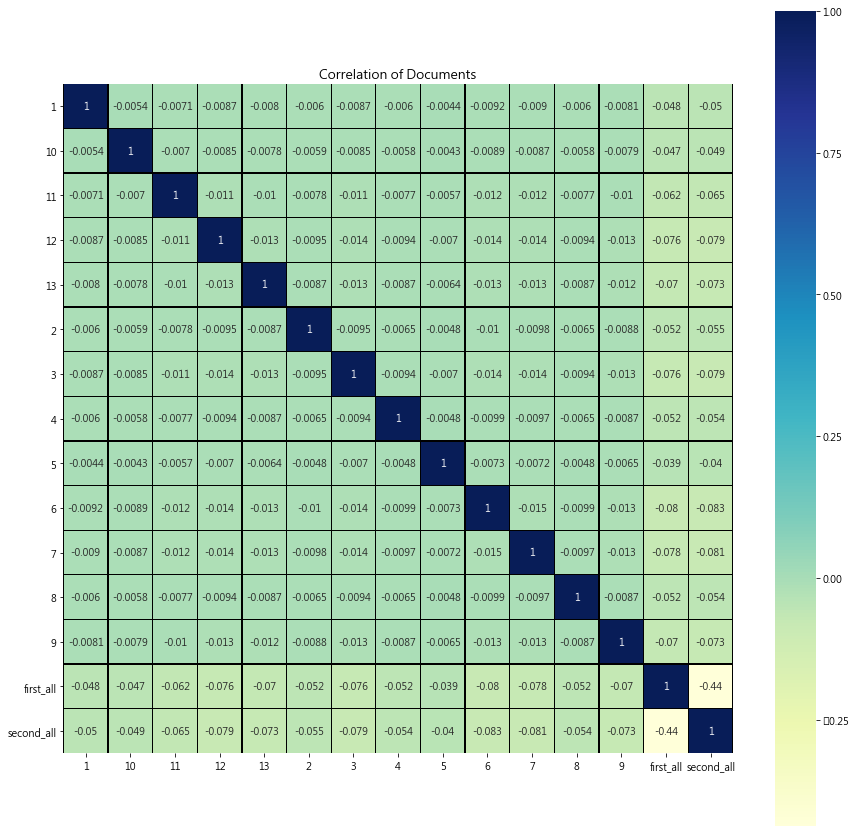

In [19]:
f, ax = plt.subplots(figsize=(15,15))
plt.title('Correlation of Documents', fontsize = 13)
sns.heatmap(data.astype(float).corr(), linewidths=0.25, vmax=1.0, square=True,
           cmap="YlGnBu", linecolor='black', annot=True)

### 將詞頻矩陣標準化

In [20]:
data_std = StandardScaler().fit_transform(data.values.T)
data_std

array([[-0.26726124, -0.26726124, -0.26726124, ..., -0.26726124,
        -0.26726124, -0.26726124],
       [-0.26726124, -0.26726124, -0.26726124, ..., -0.26726124,
        -0.26726124, -0.26726124],
       [-0.26726124, -0.26726124, -0.26726124, ..., -0.26726124,
        -0.26726124, -0.26726124],
       ...,
       [-0.26726124, -0.26726124, -0.26726124, ...,  3.74165739,
        -0.26726124, -0.26726124],
       [-0.26726124,  3.74165739, -0.26726124, ..., -0.26726124,
         3.74165739, -0.26726124],
       [ 3.74165739, -0.26726124,  3.74165739, ..., -0.26726124,
        -0.26726124, -0.26726124]])

### 將標準化後的詞頻矩陣降至 7 維

In [21]:
pca_7 = PCA(n_components=7)
x_7d = pca_7.fit_transform(data_std)
x_7d

array([[-2.72376514e+00, -1.29484053e+01, -9.23456041e-01,
        -5.64229213e-01, -9.06618739e-01, -1.03041542e+00,
         1.17573895e+00],
       [-2.72376514e+00, -1.29484053e+01, -9.23456041e-01,
        -5.64229213e-01, -9.06618739e-01, -1.03041542e+00,
         1.17573895e+00],
       [-2.75248436e+00, -1.31076895e+01, -1.47409203e+00,
        -1.01472674e+00, -1.76239335e+00, -2.28761450e+00,
         3.22281161e+00],
       [-2.77953723e+00, -1.32582393e+01, -3.27874685e+00,
        -3.85845712e+00, -1.36948528e+01,  1.81216548e+01,
        -5.30797385e+00],
       [-2.76594465e+00, -1.31825346e+01, -2.03380536e+00,
        -1.60686719e+00, -3.12290006e+00, -5.23623277e+00,
         1.64079316e+01],
       [-2.73473978e+00, -1.30092082e+01, -1.07838828e+00,
        -6.80412043e-01, -1.11482271e+00, -1.30659281e+00,
         1.55582941e+00],
       [-2.78638375e+00, -1.32964187e+01, -4.72484190e+00,
        -1.28879364e+01,  1.97716819e+01,  5.60970809e+00,
        -3.1942067

### 利用 KMeans 將 7 維數據分成 3 組

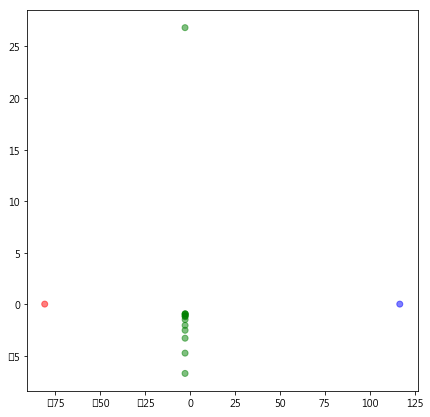

In [22]:
#Set a 3 KMeans clustering
kmeans = KMeans(n_clusters = 3)

#Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_7d)

#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_7d[:,0],x_7d[:,2], c= label_color, alpha=0.5) 
plt.show()

### 顯示各組別文件名稱

In [23]:
cluster = dict()
for ind, val in enumerate(X_clustered):
    cluster.setdefault(val, []).append(ind)
for group, ls in cluster.items():
    print('Group ', group, '( color:', LABEL_COLOR_MAP[group], '):')
    for file in ls.__iter__():
        print('\t', title[file])

Group  1 ( color: g ):
	 1
	 10
	 11
	 12
	 13
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
Group  0 ( color: r ):
	 first_all
Group  2 ( color: b ):
	 second_all


### 將標準化後的詞頻矩陣降至 4 維

In [24]:
pca_4 = PCA(n_components=4)
x_4d = pca_4.fit_transform(data_std)
x_4d

array([[-2.72376514e+00, -1.29484053e+01, -9.23456041e-01,
        -5.64229213e-01],
       [-2.72376514e+00, -1.29484053e+01, -9.23456041e-01,
        -5.64229213e-01],
       [-2.75248436e+00, -1.31076895e+01, -1.47409203e+00,
        -1.01472674e+00],
       [-2.77953723e+00, -1.32582393e+01, -3.27874685e+00,
        -3.85845712e+00],
       [-2.76594465e+00, -1.31825346e+01, -2.03380536e+00,
        -1.60686719e+00],
       [-2.73473978e+00, -1.30092082e+01, -1.07838828e+00,
        -6.80412043e-01],
       [-2.78638375e+00, -1.32964187e+01, -4.72484190e+00,
        -1.28879364e+01],
       [-2.73694533e+00, -1.30214373e+01, -1.11582981e+00,
        -7.09636912e-01],
       [-2.72376514e+00, -1.29484053e+01, -9.23456041e-01,
        -5.64229213e-01],
       [-2.80480710e+00, -1.33993137e+01,  2.68249065e+01,
         2.45930617e+00],
       [-2.79096686e+00, -1.33219940e+01, -6.69273383e+00,
         2.30092767e+01],
       [-2.74136712e+00, -1.30459648e+01, -1.19909469e+00,
      

### 利用 KMeans 將 4 維數據分成 3 組

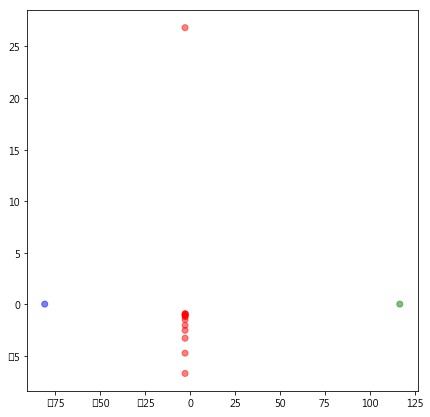

In [25]:
#Set a 3 KMeans clustering
kmeans = KMeans(n_clusters = 3)

#Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_4d)

#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_4d[:,0],x_4d[:,2], c= label_color, alpha=0.5) 
plt.show()

### 顯示各組別文件名稱

In [26]:
cluster = dict()
for ind, val in enumerate(X_clustered):
    cluster.setdefault(val, []).append(ind)
for group, ls in cluster.items():
    print('Group ', group, '( color:', LABEL_COLOR_MAP[group], '):')
    for file in ls.__iter__():
        print('\t', title[file])

Group  0 ( color: r ):
	 1
	 10
	 11
	 12
	 13
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
Group  2 ( color: b ):
	 first_all
Group  1 ( color: g ):
	 second_all
